<a href="https://colab.research.google.com/github/nowhyun/Study/blob/master/%EB%B0%95%EC%8A%A4_%ED%94%8C%EB%A1%AF(Box_Plot)%2C_%EB%B0%94%EC%9D%B4%EC%98%AC%EB%A6%BF_%ED%94%8C%EB%A1%AF(Violin_Plot).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[링크](https://junklee.tistory.com/9?category=875761)의 내용과 연계해서 코드를 보시면 효과적입니다.

# 라이브러리 불러오기

In [1]:
#데이터 분석 및 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
print("matplotlib version: {}". format(mpl.__version__))

import seaborn as sns
print("seaborn version: {}". format(sns.__version__))

import numpy as np
print("numpy version: {}". format(np.__version__))

#기타 라이브러리
import os
import random
import time

#경고 에러 무시
import warnings
warnings.filterwarnings('ignore')
print('-'*50)

matplotlib version: 3.1.3
seaborn version: 0.10.0
numpy version: 1.17.5
--------------------------------------------------


#seaborn에서 제공하는 학습 데이터 불러오기

In [2]:
dataset = sns.load_dataset('tips')
print(dataset); print('-'*50)
print(dataset.info()); print('-'*50)
print(dataset.describe()); print('-'*50)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null cate

#시각화

In [3]:
#스타일 설정
sns.set_style('whitegrid')

#사용할 특성 2가지 선택
x_col = 'day'
y_col = 'total_bill'
hue_col = 'sex'

#데이터 확인
x_col_val = dataset[x_col].values
y_col_val = dataset[y_col].values
hue_col_val = dataset[hue_col].values
print('{}행의 값:\n{}'.format(x_col, x_col_val)); print()
print('{}행의 값:\n{}'.format(y_col, y_col_val)); print()
print('{}행의 값:\n{}'.format(hue_col, hue_col_val)); print()

day행의 값:
[Sun, Sun, Sun, Sun, Sun, ..., Sat, Sat, Sat, Sat, Thur]
Length: 244
Categories (4, object): [Thur, Fri, Sat, Sun]

total_bill행의 값:
[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 20.29 13.81 11.02 18.29 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07
 26.86 25.28 14.73 10.51 17.92 27.2  22.76 17.29 19.44 16.66 10.07 32.68
 15.98 34.83 13.03 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17
 27.28 12.03 21.01 12.46 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21
 18.24 14.31 14.    7.25 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08
 11.69 13.42 14.26 15.95 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27
 11.17 12.26 18.26  8.51 10.33 14.15 16.   13.16 17.47 34

##박스 플롯(Box Plot)

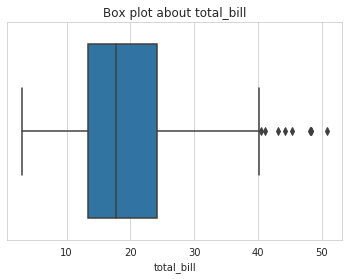

In [4]:
#단일 양적 데이터(y_col)에 대한 분포, 수치형 데이터만 가능
sns.boxplot(x=y_col, data=dataset, orient='h')
plt.title('Box plot about {}'.format(y_col))
plt.show()

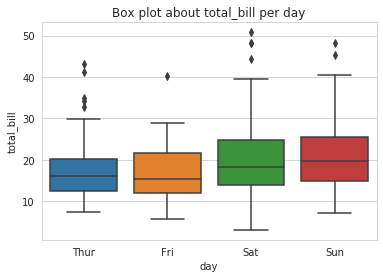

In [5]:
#일변량 질적 데이터(x_col)에 대한 분포, 보통 x축은 범주형, y축은 수치형 자료
sns.boxplot(x=x_col, y=y_col, data=dataset)
plt.title("Box plot about {} per {}".format(y_col, x_col))
plt.show()

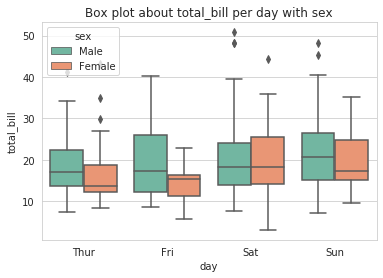

In [6]:
#이변량 질적 데이터(x_col, hue_col)에 대한 분포
sns.boxplot(x=x_col, y=y_col, hue=hue_col, data=dataset, palette='Set2')
plt.title("Box plot about {} per {} with {}".format(y_col, x_col, hue_col))
plt.show()

##바이올린 플롯(Violin Plot)

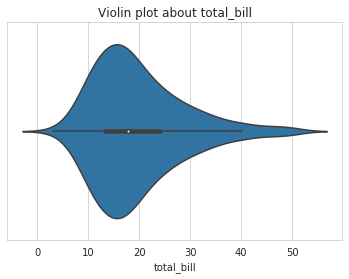

In [7]:
#단일 양적 데이터(y_col)에 대한 분포, 수치형 데이터만 가능
sns.violinplot(y=y_col, data=dataset, orient='h')
plt.title('Violin plot about {}'.format(y_col))
plt.show()

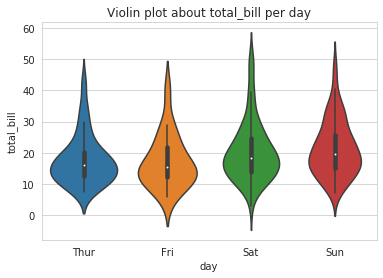

In [8]:
#일변량 질적 데이터(x_col)에 대한 분포, 보통 x축은 범주형, y축은 수치형 자료
sns.violinplot(x=x_col, y=y_col, data=dataset)
plt.title("Violin plot about {} per {}".format(y_col, x_col))
plt.show()

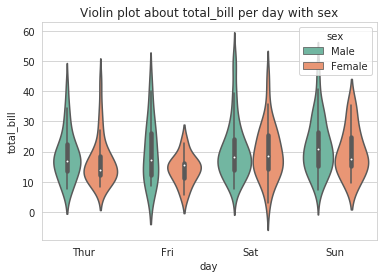

In [9]:
#이변량 질적 데이터(x_col, hue_col)에 대한 분포
sns.violinplot(x=x_col, y=y_col, hue=hue_col, data=dataset, palette='Set2')
plt.title("Violin plot about {} per {} with {}".format(y_col, x_col, hue_col))
plt.show()

##서브 플롯(Sub Plot)

[Text(0, 0.5, 'total_bill'),
 Text(0.5, 0, 'day'),
 Text(0.5, 1.0, 'Violin plot about total_bill per day with sex')]

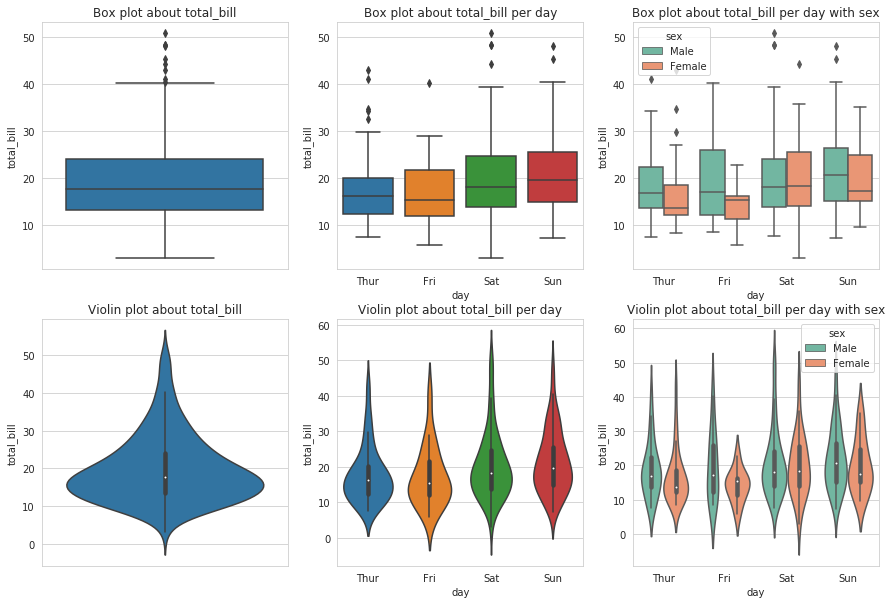

In [10]:
#서브플로팅
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(15, 10)
sns.boxplot(y=y_col, data=dataset, orient="v", ax=axes[0][0])
sns.boxplot(y=y_col, x=x_col, data=dataset, orient="v", ax=axes[0][1])
sns.boxplot(y=y_col, x=x_col, hue=hue_col, data=dataset, palette='Set2', ax=axes[0][2])
sns.violinplot(y=y_col, data=dataset, orient='v', ax=axes[1][0] )
sns.violinplot(y=y_col, x=x_col, data=dataset, orient='v', ax=axes[1][1])
sns.violinplot(y=y_col, x=x_col, hue=hue_col, data=dataset, palette='Set2', ax=axes[1][2])

#label 및 title 설정
axes[0][0].set(ylabel=y_col, title='Box plot about {}'.format(y_col))
axes[0][1].set(ylabel=y_col, xlabel=x_col, title="Box plot about {} per {}".format(y_col, x_col))
axes[0][2].set(ylabel=y_col, xlabel=x_col, title="Box plot about {} per {} with {}".format(y_col, x_col, hue_col))
axes[1][0].set(ylabel=y_col, title='Violin plot about {}'.format(y_col))
axes[1][1].set(ylabel=y_col, xlabel=x_col, title="Violin plot about {} per {}".format(y_col, x_col))
axes[1][2].set(ylabel=y_col, xlabel=x_col, title="Violin plot about {} per {} with {}".format(y_col, x_col, hue_col))